In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("ml_alzheimer/dataset_CB23.csv")

In [48]:
df.select_dtypes(include=['object'])

,sex,visit,apoe_result,family_dementia_history,ATN,np_date,DX,DXCHANGE
0,f,V1,e3/e3,Yes,A-T-N+,06/02/2017,Dem,Stable: Dementia
1,m,V1,e4/e4,Yes,A-T-N-,09/02/2017,MCI,Reversion: MCI to NC
2,f,V1,e3/e3,Yes,A-T-N-,08/15/2017,Dem,Stable: Dementia
3,f,V1,e2/e4,Yes,A-T-N-,08/08/2017,NaN,NaN
4,f,V1,e3/e4,Yes,NaN,06/19/2017,Dem,Stable: Dementia
...,...,...,...,...,...,...,...,...
2995,m,V3,NaN,Yes,NaN,01/22/2021,NaN,NaN
2996,m,V3,e3/e4,Yes,NaN,12/23/2022,MCI,NaN
2997,m,V3,e3/e4,Yes,NaN,NaN,Dem,NaN
2998,m,V3,e3/e4,Yes,NaN,06/23/2023,NC,NaN


In [49]:
df["sex"] = df["sex"].astype('category')
df["visit"] = df["visit"].astype('category')
df["apoe_result"] = df["apoe_result"].astype('category')
df["family_dementia_history"] = df["family_dementia_history"].astype("category")
df["ATN"] = df["ATN"].astype("category")
df["np_date"] = pd.to_datetime(df["np_date"])
df["DX"] = df["DX"].astype('category')
df["DXCHANGE"] = df["DXCHANGE"].astype('category')


In [50]:
df["Depression"] = df["Depression"].astype('bool')
df["APOE4"] = df["APOE4"].astype('category')

In [51]:
df_v1 = df[df["visit"]=="V1"]
df_v1.set_index('patient_id', inplace=True)
df_v1.drop(columns=["visit"], inplace=True)

# v2
df_v2 = df[df["visit"]=="V2"]
df_v2.set_index('patient_id', inplace=True)
df_v2.drop(columns=["visit"], inplace=True)
df_v2 = df_v2.dropna(axis=1, how='all')

# v3
df_v3 = df[df["visit"]=="V3"]
df_v3.set_index('patient_id', inplace=True)
df_v3.drop(columns=["visit"], inplace=True)
df_v3 = df_v3.dropna(axis=1, how='all')

C:\Users\anaso\AppData\Local\Temp\ipykernel_14496\2291764590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v1.drop(columns=["visit"], inplace=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_14496\2291764590.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v2.drop(columns=["visit"], inplace=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_14496\2291764590.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v3.drop(

In [52]:
df_v1.to_csv("ml_alzheimer/clean_tables/df_v1", index = False)
df_v2.to_csv("ml_alzheimer/clean_tables/df_v2", index = False)
df_v3.to_csv("ml_alzheimer/clean_tables/df_v3", index = False)

## new tables

In [59]:
visit2 = pd.read_csv("ml_alzheimer/clean_tables/df_v2")

array([[<Axes: title={'center': 'age_years'}>,
        <Axes: title={'center': 'years_education'}>,
        <Axes: title={'center': 'APOE4'}>],
       [<Axes: title={'center': 'MONTHS'}>,
        <Axes: title={'center': 'mmse_total'}>,
        <Axes: title={'center': 'gds_total'}>],
       [<Axes: title={'center': 'cdr_global'}>,
        <Axes: title={'center': 'cdr_sob'}>, <Axes: >]], dtype=object)

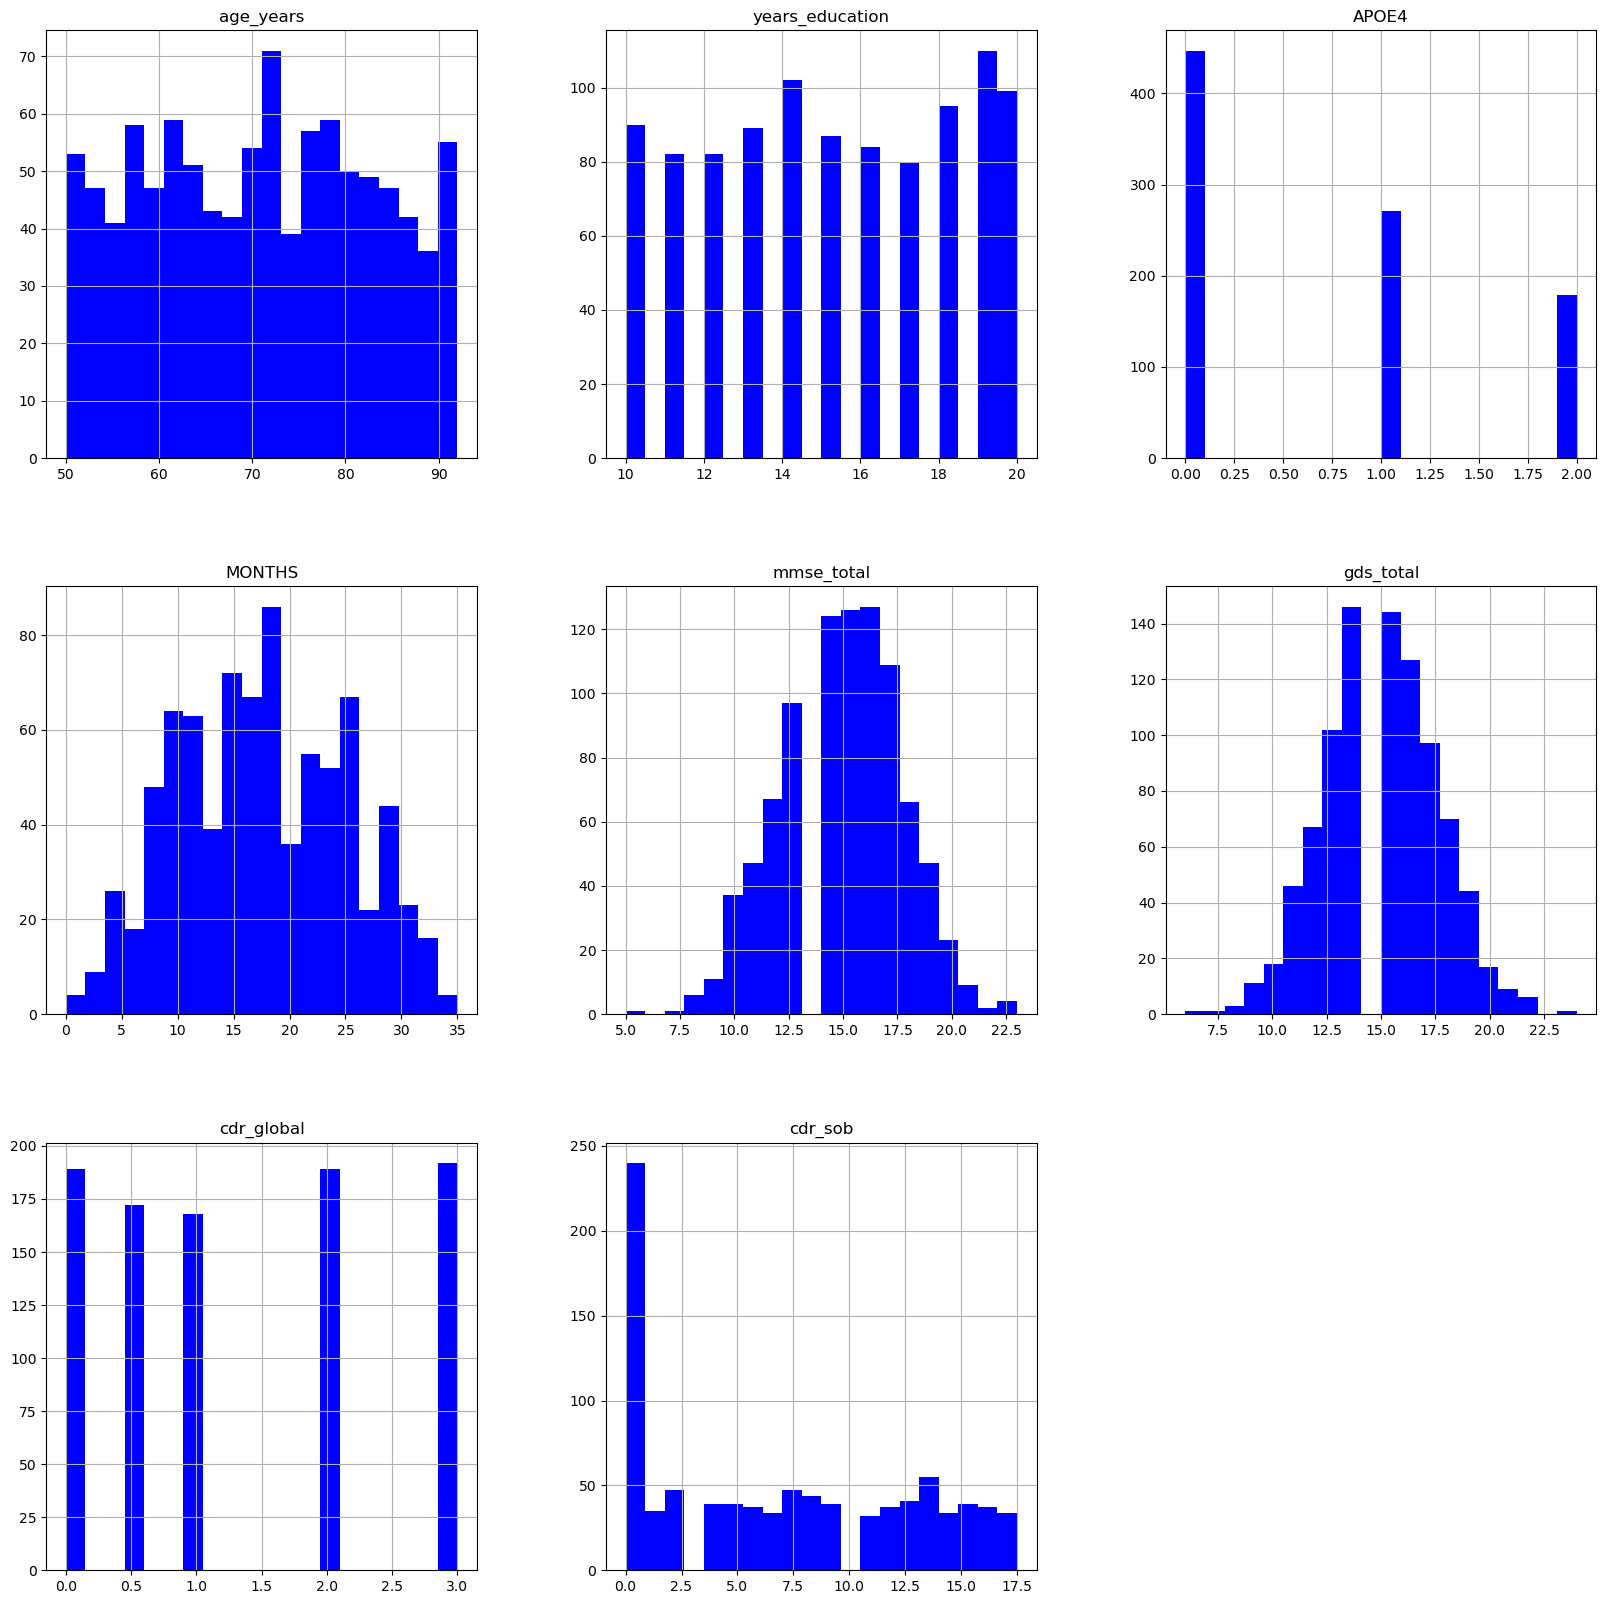

In [54]:
visit2.hist(bins=20, figsize=(20,20), color='b')

In [60]:
visit2.describe()

,age_years,years_education,APOE4,MONTHS,mmse_total,gds_total,cdr_global,cdr_sob
count,1000.000000,1000.000000,897.000000,815.000000,904.000000,910.000000,910.000000,910.000000
mean,70.767000,15.160000,0.701226,17.450307,14.920354,14.964835,1.327473,6.976374
std,11.829821,3.199474,0.780574,7.513603,2.744624,2.569790,1.095753,5.850798
min,50.000000,10.000000,0.000000,0.000000,5.000000,6.000000,0.000000,0.000000
25%,61.000000,12.000000,0.000000,12.000000,13.000000,13.000000,0.500000,0.500000
50%,71.000000,15.000000,1.000000,17.000000,15.000000,15.000000,1.000000,6.500000
75%,81.000000,18.000000,1.000000,24.000000,17.000000,17.000000,2.000000,12.500000
max,92.000000,20.000000,2.000000,35.000000,23.000000,24.000000,3.000000,17.500000


In [61]:
df_v1["ATN"].value_counts()

ATN
A-T-N-    562
A-T-N+    240
A+T-N-     61
A-T+N-     25
A-T+N+     10
A+T+N+      1
A+T+N-      1
Name: count, dtype: int64

TO DO 
- separar o marcador ATN em 3 colunas onde por bools.
- A stands for abeta42
- T stands for ptau result
- N Ttau result

In [65]:
df_v1.columns

Index(['sex', 'age_years', 'years_education', 'APOE4', 'apoe_result',
       'family_dementia_history', 'ptau_result', 'ttau_result',
       'abeta42_result', 'AMYL', 'TAUO', 'NEUROD', 'ATN', 'MONTHS',
       'mmse_total', 'np_date', 'gds_total', 'Depression', 'cdr_global', 'DX',
       'cdr_sob', 'LHVL', 'LHVR', 'LHV', 'LWMV', 'VASCULAR', 'DXCHANGE'],
      dtype='object')

In [68]:
# select tauo and ptauo columns
df_v1[["abeta42_result","ptau_result", "ttau_result","TAUO", "ATN"]]

,abeta42_result,ptau_result,ttau_result,TAUO,ATN
patient_id,,,,,
1,1363.0,16.3,331.0,0.0,A-T-N+
2,1700.0,22.9,223.0,0.0,A-T-N-
3,1406.0,19.8,202.0,0.0,A-T-N-
4,1150.0,22.1,80.0,0.0,A-T-N-
5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
996,1009.0,37.9,268.0,1.0,A-T+N+
997,1700.0,21.7,382.0,0.0,A-T-N+
998,NaN,NaN,NaN,NaN,NaN


In [121]:
# separate ATN column in 3 columns with bools
df_v1["A"] = df_v1["ATN"].str[1].replace({'-': False, '+': True}).astype('bool')
df_v1["T"] = df_v1["ATN"].str[3].replace({'-': False, '+': True}).astype('bool')
df_v1["N"] = df_v1["ATN"].str[5].replace({'-': False, '+': True}).astype('bool')

C:\Users\anaso\AppData\Local\Temp\ipykernel_14496\1270908955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v1["A"] = df_v1["ATN"].str[1].replace({'-': False, '+': True}).astype('bool')
C:\Users\anaso\AppData\Local\Temp\ipykernel_14496\1270908955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v1["T"] = df_v1["ATN"].str[3].replace({'-': False, '+': True}).astype('bool')
C:\Users\anaso\AppData\Local\Temp\ipykernel_14496\1270908955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

In [125]:
((df_v1["abeta42_result"] < 580) == df_v1["A"]).value_counts()

True     900
False    100
Name: count, dtype: int64

In [126]:
((df_v1["ptau_result"] > 37 ) == df_v1["T"]).value_counts()

True     900
False    100
Name: count, dtype: int64

In [127]:
((df_v1["ttau_result"] > 250) == df_v1["N"]).value_counts()

True     878
False    122
Name: count, dtype: int64

In [134]:
df_bla = df_v1[["abeta42_result","ptau_result", "ttau_result", "ATN"]]
indices_na = df_bla[df_bla.isna().all(axis=1)].index
indices_na

Index([  5,  17,  37,  41,  59,  67,  80,  84,  86,  87,  90,  91,  98,  99,
       113, 121, 136, 138, 140, 154, 192, 222, 242, 244, 270, 295, 314, 316,
       319, 339, 365, 379, 386, 387, 389, 390, 402, 406, 411, 413, 420, 439,
       440, 454, 466, 469, 470, 471, 477, 479, 497, 508, 519, 534, 537, 540,
       546, 551, 576, 599, 600, 628, 630, 635, 636, 644, 648, 652, 666, 682,
       698, 706, 710, 721, 728, 735, 781, 787, 802, 817, 826, 840, 846, 849,
       852, 869, 870, 880, 884, 905, 911, 936, 939, 950, 953, 956, 972, 986,
       989, 998],
      dtype='int64', name='patient_id')

In [142]:
df_v1 = df_v1.drop(indices_na, inplace=False)
df_v2 = df_v2.drop(indices_na, inplace=False)
df_v3 = df_v3.drop(indices_na, inplace=False)

In [124]:
df_v1[["ATN","A", "T", "N",'abeta42_result','ptau_result', 'ttau_result']]

,ATN,A,T,N,abeta42_result,ptau_result,ttau_result
patient_id,,,,,,,
1,A-T-N+,False,False,True,1363.0,16.3,331.0
2,A-T-N-,False,False,False,1700.0,22.9,223.0
3,A-T-N-,False,False,False,1406.0,19.8,202.0
4,A-T-N-,False,False,False,1150.0,22.1,80.0
5,NaN,True,True,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...
996,A-T+N+,False,True,True,1009.0,37.9,268.0
997,A-T-N+,False,False,True,1700.0,21.7,382.0
998,NaN,True,True,True,NaN,NaN,NaN


In [73]:
df_v1["VASCULAR"].value_counts()

VASCULAR
1.0    510
0.0    490
Name: count, dtype: int64

In [84]:
pd.concat([df_v1[["DXCHANGE", "DX"]], df_v2["DX"], df_v3["DX"]], axis=1)

,DXCHANGE,DX,DX,DX
patient_id,,,,
1,Stable: Dementia,Dem,Dem,Dem
2,Reversion: MCI to NC,MCI,Dem,NC
3,Stable: Dementia,Dem,NC,Dem
4,NaN,NaN,NaN,Dem
5,Stable: Dementia,Dem,NaN,Dem
...,...,...,...,...
996,NaN,MCI,Dem,NaN
997,Reversion: Dementia to MCI,Dem,MCI,MCI
998,Conversion: MCI to Dementia,MCI,NC,Dem


In [88]:
dic = dict()

In [92]:
dic[0]="NC"
dic[0.5]="MCI"
dic[1.0] = "Dem"
dic[2.0] = "Dem"
dic[3.0] = "Dem"

In [94]:
df_v3["cdr_global_to_DX"] = df_v3["cdr_global"].map(dic)

In [103]:
df_v3["cdr_global_to_DX"].iloc[995]

nan

In [105]:
# count how many entries are equal in DX and cdr_global_to_DX columns:
(df_v3["DX"]==df_v3["cdr_global_to_DX"]).value_counts()

True     896
False    104
Name: count, dtype: int64

In [97]:
df_v3["DX"].isna().sum()

104

In [95]:
df_v3[["cdr_global", "DX", "cdr_global_to_DX"]]

,cdr_global,DX,cdr_global_to_DX
patient_id,,,
1,3.0,Dem,Dem
2,0.0,NC,NC
3,3.0,Dem,Dem
4,2.0,Dem,Dem
5,2.0,Dem,Dem
...,...,...,...
996,NaN,NaN,NaN
997,0.5,MCI,MCI
998,3.0,Dem,Dem


In [91]:
df_v3["cdr_global"].value_counts()

cdr_global
3.0    186
1.0    186
0.0    183
0.5    175
2.0    166
Name: count, dtype: int64

In [108]:
df_v1["APOE4"].value_counts()

APOE4
0.0    447
1.0    271
2.0    179
Name: count, dtype: int64

In [111]:
df_v1["apoe_result"].value_counts()

apoe_result
e3/e3    310
e3/e4    229
e4/e4    179
e2/e3     96
e2/e4     42
e2/e2     41
Name: count, dtype: int64

In [175]:
# see columns with nan values
df_v1[["APOE4", "MONTHS", "mmse_total"]].isna()

,APOE4,MONTHS,mmse_total
patient_id,,,
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
6,False,False,False
...,...,...,...
995,True,False,False
996,True,False,False
997,False,False,False


In [146]:
df_v1["AMYL"].value_counts()

AMYL
0.0    837
1.0     63
Name: count, dtype: int64

In [163]:
df_v1["AMYL"].value_counts()

AMYL
False    755
True     145
Name: count, dtype: int64

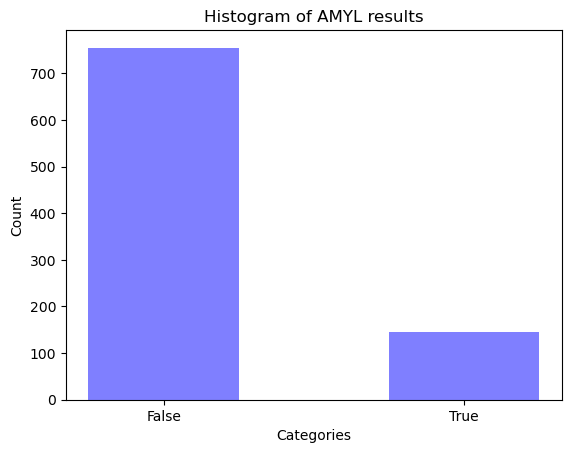

In [171]:
value_counts = df_v1["AMYL"].astype("category").value_counts()
plt.bar(value_counts.index.astype("str"), value_counts.values, color='b', alpha=0.5, width=0.5, align='center')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Histogram of AMYL results')
plt.show()

In [179]:
(df_v1["A"] & df_v1["T"]).value_counts()

False    898
True       2
Name: count, dtype: int64

In [181]:
df_v2.columns


Index(['sex', 'age_years', 'years_education', 'APOE4', 'apoe_result',
       'family_dementia_history', 'MONTHS', 'mmse_total', 'np_date',
       'gds_total', 'Depression', 'cdr_global', 'DX', 'cdr_sob'],
      dtype='object')

In [1]:
df_v2["APOE4", "apoe_result"]

NameError: name 'df_v2' is not defined